In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [2]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False
# matplotlib 한글 폰트문제 해결 코드

In [3]:
finedust = pd.read_csv('../data/TaejeonPM10.csv', encoding='utf-8', names=['Date','Data'], index_col=0)
finedust = finedust[finedust['Data'].notnull()]
finedust.head()
# Date Data라는 컬럼명설정 
# 첫번째 칼럼을 index로 설정
# 'Data'값이 Null값이 아닌것만 표현

,Data
Date,
18. 1. 1.,48
18. 1. 2.,75
18. 1. 3.,30
18. 1. 4.,37
18. 1. 5.,43


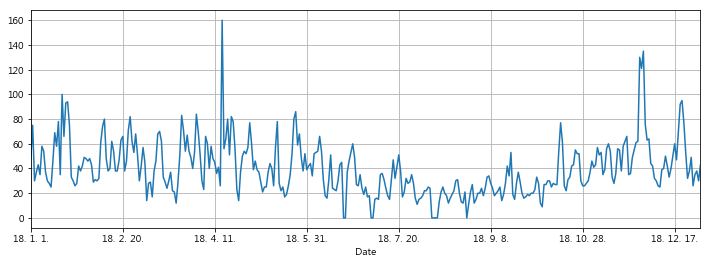

In [4]:
finedust['Data'].plot(figsize=(12,4), grid=True);

In [5]:
time = np.arange(0,len(finedust))
traffic = finedust['Data'].values
fx = np.linspace(0, time[-1], 1000)
# 시간축 만듬

In [6]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))
# 회귀를 위해 에러 함수 정의

In [7]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))
# 모델의 적합성 확인위해 참값과 비교해서 에러를 계산함

21.646996079785158
20.163672647251705
19.216435808250775
17.97736367957657


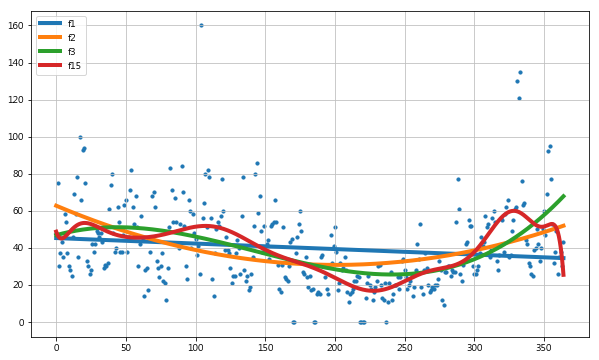

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc=2)
plt.show()
# 1,2,3,15차 함수로 표현한 결과

In [9]:
df = pd.DataFrame({'ds':finedust.index, 'y':finedust['Data']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['Date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);
# ds의 형식을 2019-02-25 식으로 변경
# Prophet 함수를 사용할 때 주기성이 연단위 일단위로 있다고 설정

In [10]:
future = m.make_future_dataframe(periods=365)
future.tail()
# 이후 365일간 데이터 예측

,ds
725,2019-12-27
726,2019-12-28
727,2019-12-29
728,2019-12-30
729,2019-12-31


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
725,2019-12-27,37.660951,14.272497,59.358535
726,2019-12-28,38.111751,17.195750,62.047331
727,2019-12-29,39.237290,17.882374,60.897403
728,2019-12-30,39.073041,16.469352,61.884793
729,2019-12-31,39.610503,19.034773,60.580736


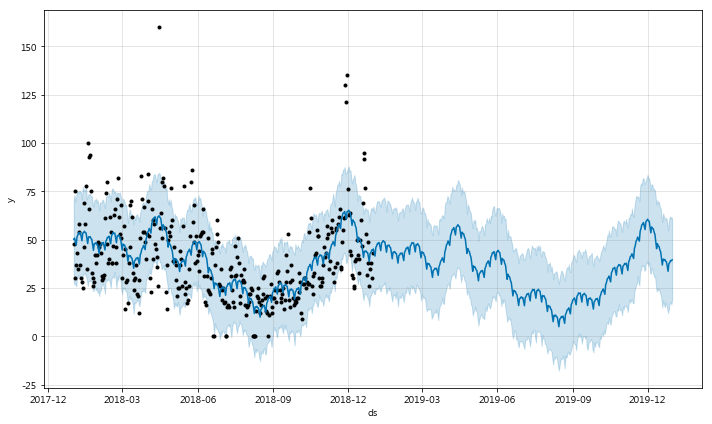

In [12]:
m.plot(forecast);
# 2019-12-31까지 예측값 그래프화

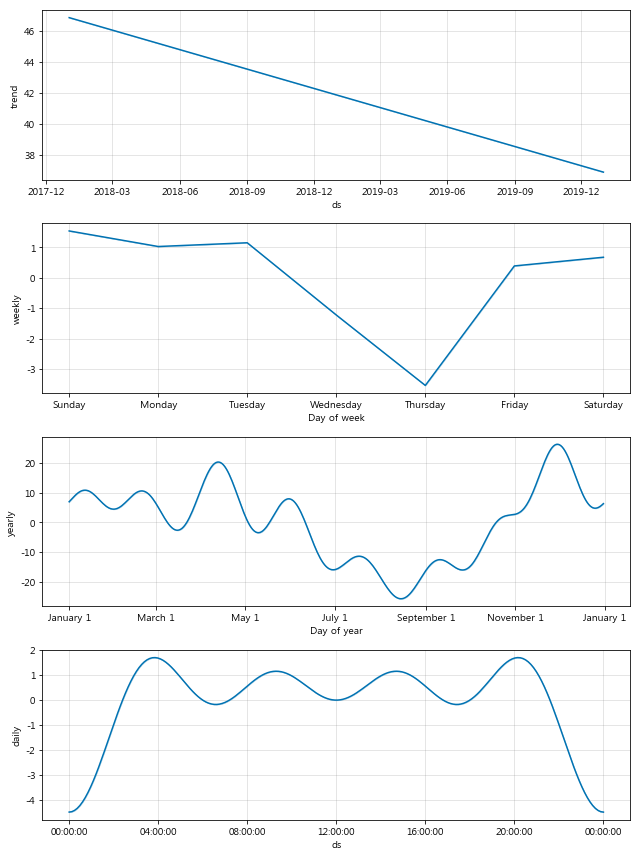

In [13]:
m.plot_components(forecast);
# 경향 주 년 일단위 표시

In [14]:
finedust25 = pd.read_csv('../data/TaejeonPM25.csv', encoding='utf-8', names=['Date','Data'], index_col=0)
finedust25 = finedust25[finedust25['Data'].notnull()]
finedust25.head()
# 2013~2018년 대구 태전동 초미세먼지 데이터

,Data
Date,
13. 1. 1.,44
13. 1. 2.,27
13. 1. 3.,15
13. 1. 4.,18
13. 1. 5.,0


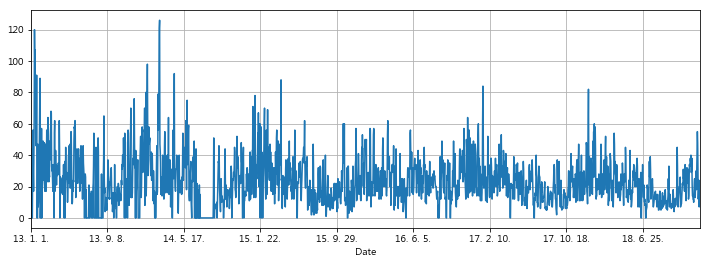

In [15]:
finedust25['Data'].plot(figsize=(12,4), grid=True);

In [16]:
finedust225 = pd.read_csv('../data/Taejeon2PM25.csv', encoding='utf-8', names=['Date','Data'], index_col=0)
finedust225 = finedust225[finedust225['Data'].notnull()]
finedust225.head()
# 2013.1.1 ~ 2016.12.31일 대구 태전동 초미세먼지 데이터

,Data
Date,
13. 1. 1.,44
13. 1. 2.,27
13. 1. 3.,15
13. 1. 4.,18
13. 1. 5.,0


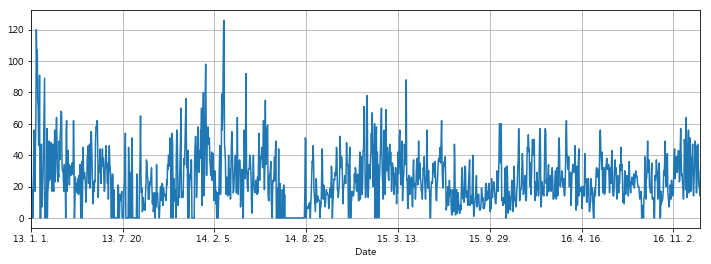

In [17]:
finedust225['Data'].plot(figsize=(12,4), grid=True);

In [18]:
df2 = pd.DataFrame({'ds':finedust225.index, 'y':finedust225['Data']})
df2.reset_index(inplace=True)
df2['ds'] = pd.to_datetime(df2['ds'], format="%y. %m. %d.")
del df2['Date']
df2.head()
# ds의 형식을 2019-02-25 식으로 변경

,ds,y
0,2013-01-01,44
1,2013-01-02,27
2,2013-01-03,15
3,2013-01-04,18
4,2013-01-05,0


In [19]:
m = Prophet(daily_seasonality=True)
m.fit(df2);
# Prophet 함수를 사용할 때 주기성이 일단위로 있다고 설정

In [20]:
future = m.make_future_dataframe(periods=365)
future.tail()
# 365일(1년) 예측함

,ds
1820,2017-12-27
1821,2017-12-28
1822,2017-12-29
1823,2017-12-30
1824,2017-12-31


In [21]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1820,2017-12-27,38.773473,20.535807,57.905854
1821,2017-12-28,39.372157,21.247506,59.209427
1822,2017-12-29,41.155657,22.310216,61.193736
1823,2017-12-30,42.543200,23.479687,60.997903
1824,2017-12-31,43.335605,24.179757,61.781544


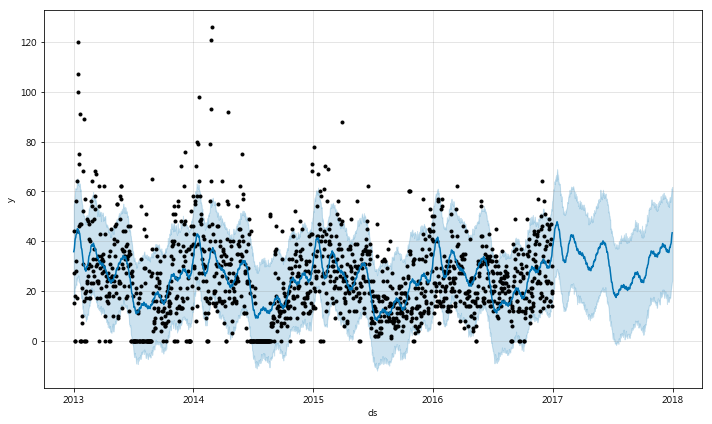

In [22]:
m.plot(forecast);
# 2016.12.31까지 예측값 그래프화

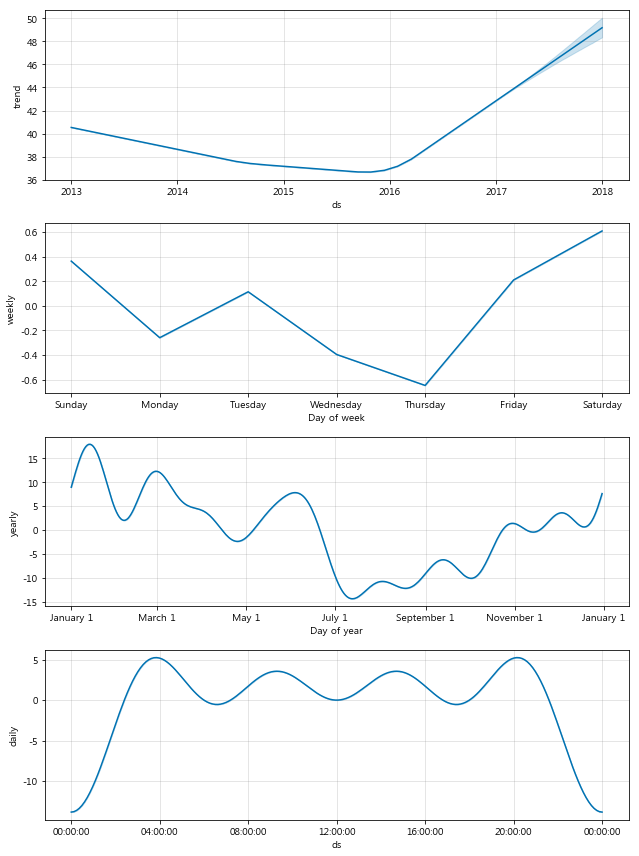

In [23]:
m.plot_components(forecast);
# 경향 주 년 일단위 표시

In [24]:
finedust25 = pd.read_csv('../data/TaejeonPM25.csv', encoding='utf-8', names=['Date','Data'], index_col=0)
finedust25 = finedust25[finedust25['Data'].notnull()]
finedust25.head()
# 2013~2018년 대구 태전동 초미세먼지 데이터

,Data
Date,
13. 1. 1.,44
13. 1. 2.,27
13. 1. 3.,15
13. 1. 4.,18
13. 1. 5.,0


In [25]:
df3 = pd.DataFrame({'ds':finedust25.index, 'y':finedust25['Data']})
df3.reset_index(inplace=True)
df3['ds'] = pd.to_datetime(df3['ds'], format="%y. %m. %d.")
del df3['Date']
df3.head()
# ds의 형식을 2013-01-01 식으로 변경

,ds,y
0,2013-01-01,44
1,2013-01-02,27
2,2013-01-03,15
3,2013-01-04,18
4,2013-01-05,0


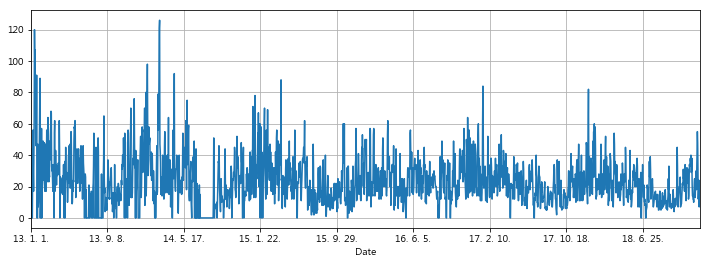

In [26]:
finedust25['Data'].plot(figsize=(12,4), grid=True);

In [27]:
finedust225 = pd.read_csv('../data/Taejeon2PM25.csv', encoding='utf-8', names=['Date','Data'], index_col=0)
finedust225 = finedust225[finedust225['Data'].notnull()]
finedust225.head()
# 2013.1.1 ~ 2016.12.31일 대구 태전동 초미세먼지 데이터

,Data
Date,
13. 1. 1.,44
13. 1. 2.,27
13. 1. 3.,15
13. 1. 4.,18
13. 1. 5.,0


In [28]:
df2 = pd.DataFrame({'ds':finedust225.index, 'y':finedust225['Data']})
df2.reset_index(inplace=True)
df2['ds'] = pd.to_datetime(df2['ds'], format="%y. %m. %d.")
del df2['Date']
df2.head()
# ds의 형식을 2013-01-01 식으로 변경

,ds,y
0,2013-01-01,44
1,2013-01-02,27
2,2013-01-03,15
3,2013-01-04,18
4,2013-01-05,0


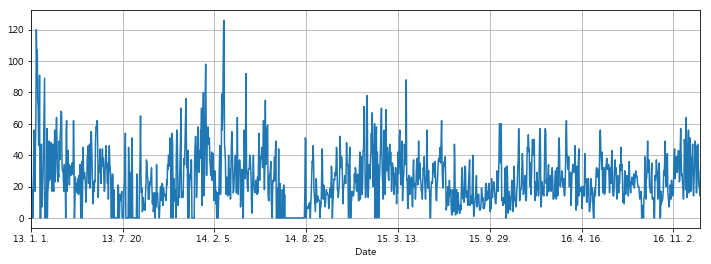

In [29]:
finedust225['Data'].plot(figsize=(12,4), grid=True);

In [30]:
m = Prophet(daily_seasonality=True)
m.fit(df2);
# Prophet 함수를 사용할 때 주기성이 일단위로 있다고 설정

In [31]:
future = m.make_future_dataframe(periods=730)
future.tail()
# 730일(2년) 예측함

,ds
2185,2018-12-27
2186,2018-12-28
2187,2018-12-29
2188,2018-12-30
2189,2018-12-31


In [32]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2185,2018-12-27,44.674177,23.456195,63.259448
2186,2018-12-28,46.362414,26.329548,66.908346
2187,2018-12-29,47.669200,29.497428,67.812730
2188,2018-12-30,48.397617,29.322148,65.683908
2189,2018-12-31,48.801730,30.088730,68.404106


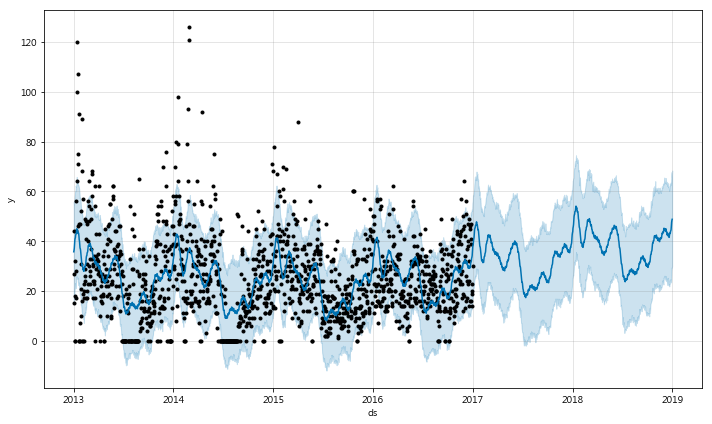

In [33]:
m.plot(forecast);
# 2018.12.31까지 예측값 그래프화

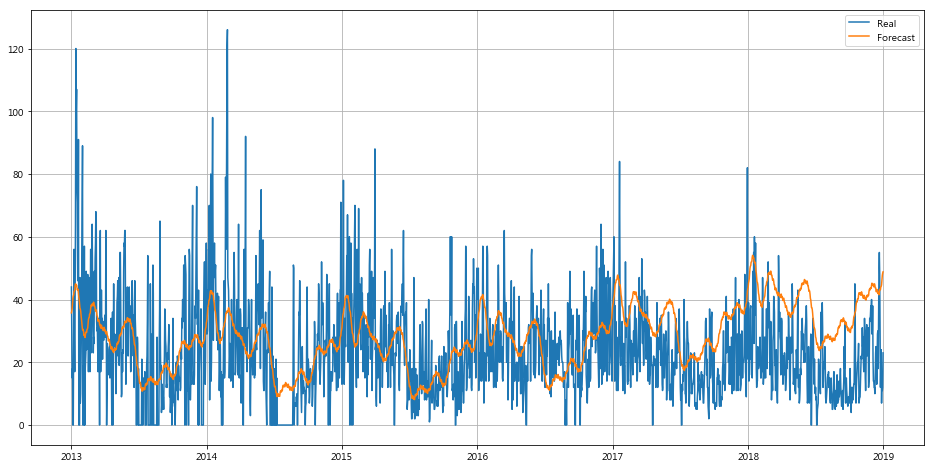

In [34]:
plt.figure(figsize=(16,8))
plt.plot(df3['ds'], df3['y'], label='Real')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
plt.grid()
plt.legend()
plt.show()
# 2017~2018년 실제값과 예측값을 같이 두고 그래프화
# 2018년 7~10월, 12월값을 제외하곤 대체적으로 맞는 모습 (아래는 실제값이 낮게 나온 이유)

# 2018년 7월 중순의 계속된 한반도 폭염의 원인인 고기압으로 인해 중국으로부터의 기류 유입이 없어지자, 
# 극도로 정체된 기단상황에도 불구하고 폭염기간 내내 미세먼지 없는 맑은 하늘을 유지하였다. 
# 이는 거의 대부분의 미세먼지 원인이 중국임을 증명하는 사례라 할 수 있겠다. -서울신문

# 2018년 12월, 겨울이 되면서 중국에서 날아올 난방용 화력발전에 의한 미세먼지와 스모그가 많을 것으로 예상되었으나 
# 의외로 내내 좋음 상태를 유지했는데, 알고보니 러시아쪽 고기압이 중국발 미세먼지를 막는 기류를 형성해주었기 때문이었다. 
# 덕분에 어마무시한 한파가 예보되긴 하나 오히려 살만해진 편. -국민일보